## Evaluation of our model in the test partition

In [26]:
import numpy as np
import os
import random
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

%matplotlib inline

from utils import label_map_util
from utils import visualization_utils as vis_util

## Model preparation 

In [44]:
HOME = os.environ['HOME']
PATH_TO_CKPT = os.path.join(HOME, 'temp/20171207-train_miotcd/output_inference_graph.pb/frozen_inference_graph.pb')
PATH_TO_LABELS = os.path.join(HOME, 'temp/MIO-TCD-Localization/miotcd.pbtxt')

NUM_CLASSES = 11

PATH_TO_TEST_IMAGES_DIR = os.path.join(HOME, '/home/frodo/temp/MIO-TCD-Localization/test/')
numtest = 10

IMAGE_SIZE = (12, 8) # Size, in inches, of the output images.

In [39]:
detection_graph = tf.Graph()

with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')
    print('Model loaded.')

Model loaded.


In [40]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map,
                                                            max_num_classes=NUM_CLASSES,
                                                            use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [41]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [42]:
test_image_paths = []

counter = 0
for f in os.listdir(PATH_TO_TEST_IMAGES_DIR):
    if counter >= numtest: break
    filename = os.path.join(PATH_TO_TEST_IMAGES_DIR, f)
    if filename.endswith('.jpg'):
        test_image_paths.append(filename)
        counter += 1

print(test_image_paths[:10])

['/home/frodo/temp/MIO-TCD-Localization/test/00136604.jpg', '/home/frodo/temp/MIO-TCD-Localization/test/00113992.jpg', '/home/frodo/temp/MIO-TCD-Localization/test/00123057.jpg', '/home/frodo/temp/MIO-TCD-Localization/test/00111025.jpg', '/home/frodo/temp/MIO-TCD-Localization/test/00120581.jpg', '/home/frodo/temp/MIO-TCD-Localization/test/00113848.jpg', '/home/frodo/temp/MIO-TCD-Localization/test/00134018.jpg', '/home/frodo/temp/MIO-TCD-Localization/test/00114414.jpg', '/home/frodo/temp/MIO-TCD-Localization/test/00119611.jpg', '/home/frodo/temp/MIO-TCD-Localization/test/00127381.jpg']


## Finally, the detection

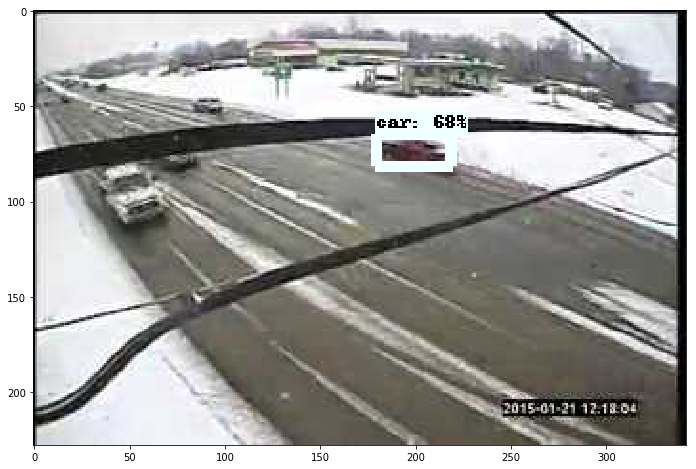

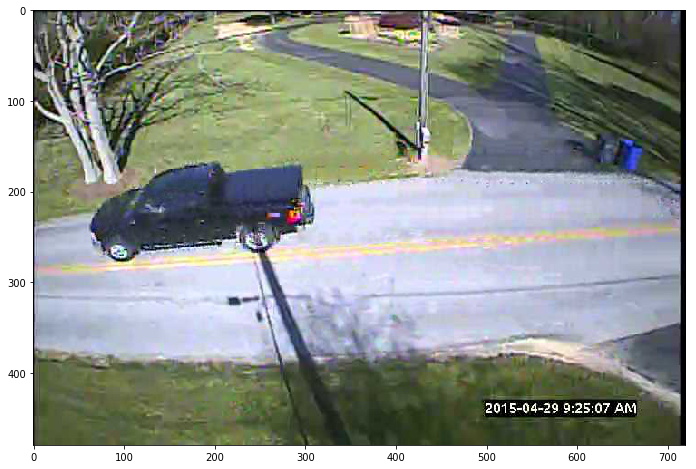

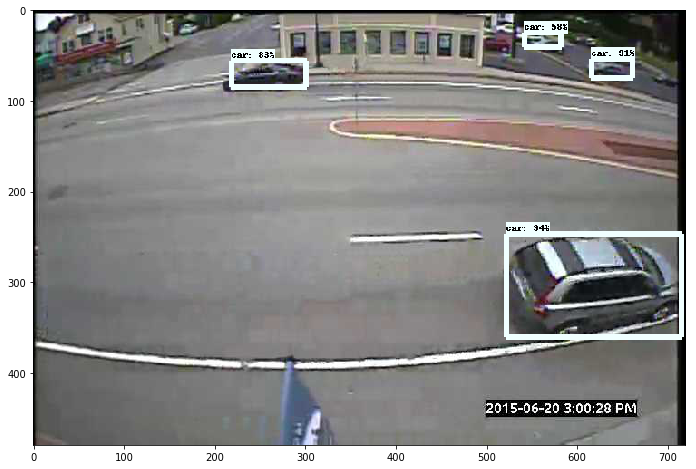

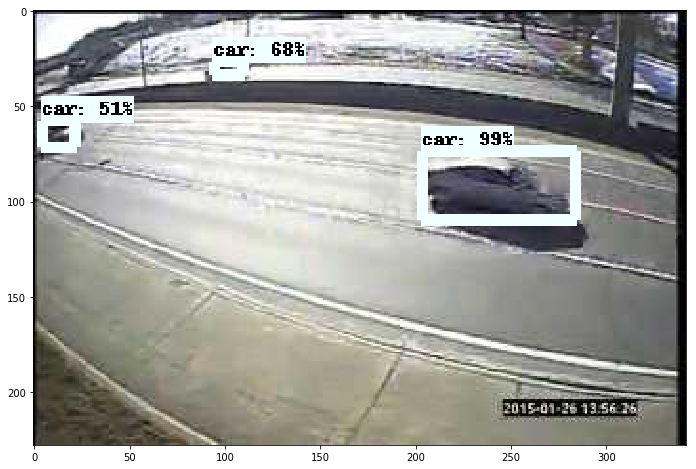

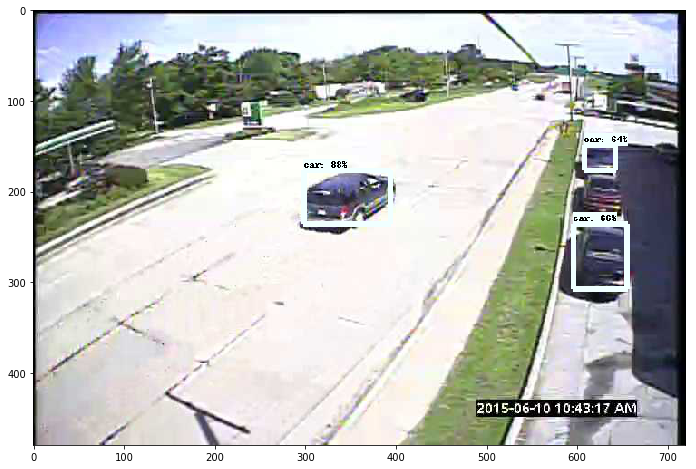

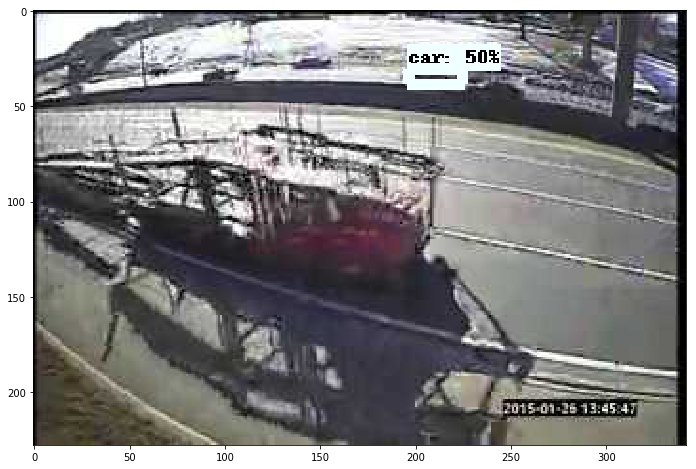

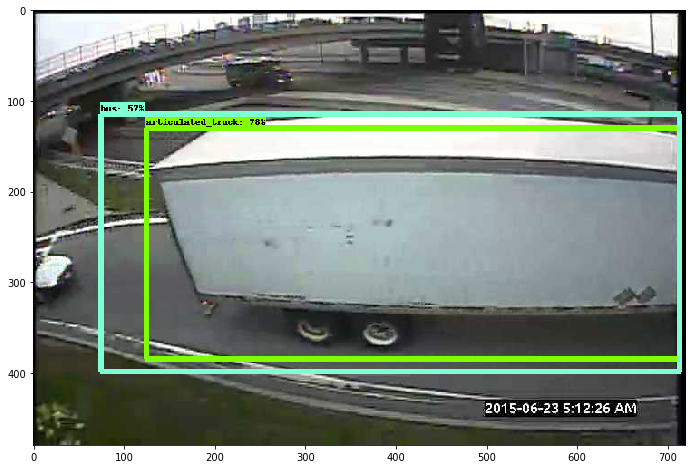

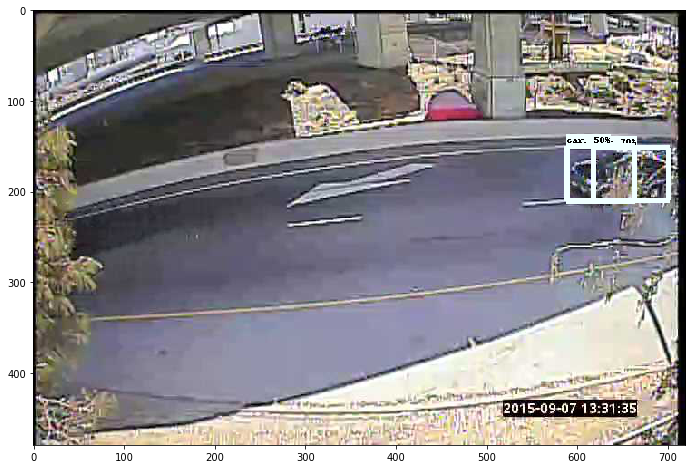

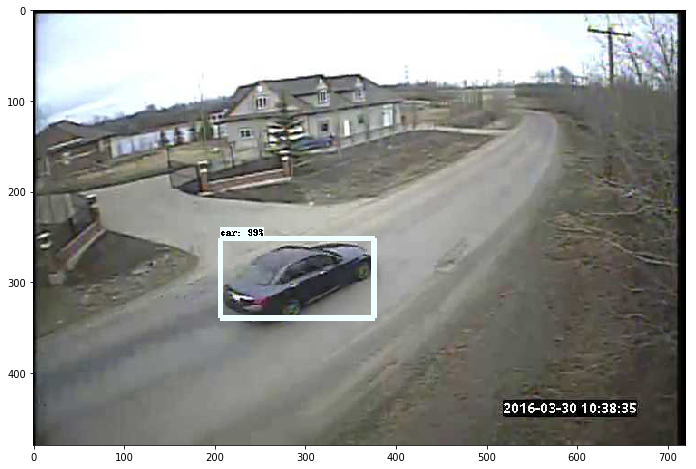

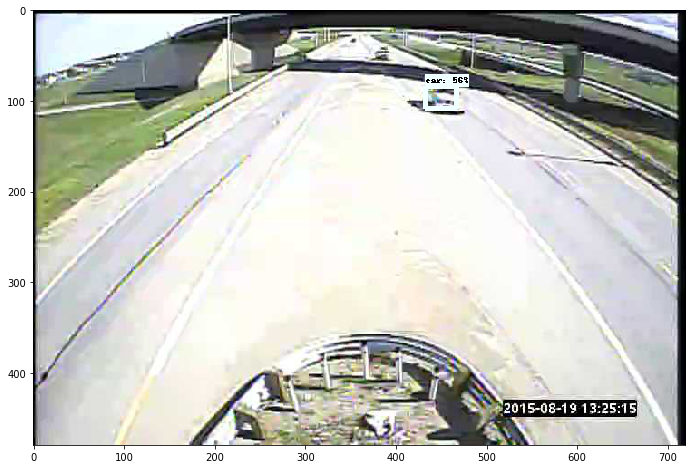

In [46]:
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      image_np = load_image_into_numpy_array(image)
      image_np_expanded = np.expand_dims(image_np, axis=0)
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})

      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=6)
    
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)